In [12]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [2]:
def g_h_filter(data, x0, dx, g, h, dt=1.):
    x_est = x0
    results = []
    for z in data:
        #prediction step
        x_pred = x_est + (dx*dt)
        dx = dx

        # update step
        residual = z - x_pred
        dx = dx    + h * (residual) / dt
        x_est  = x_pred + g * residual     
        results.append(x_est)  
    return np.array(results)

In [27]:
# Load data
mat = scipy.io.loadmat('/home/lex/MEGAsync/1_MSE/2_Projects/Project_2/4_Algorithms/ind_1_Walking.mat')
sig=mat['sig']
sigFiltered=g_h_filter(sig[0,:], sig[0,0], 1, 0.1, 0.4, dt=1.)

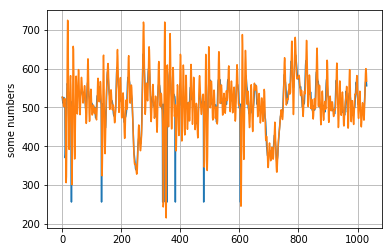

In [28]:
plt.plot(sig[0,:])
plt.plot(sigFiltered)
plt.ylabel('some numbers')
plt.grid()
plt.show()